In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
files = [file for file in os.listdir('Sales_Data')]

In [3]:
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
all_sales_data = pd.DataFrame()

In [5]:
path = 'Sales_Data'

for file in files:
    current_df = pd.read_csv(f"{path}/{file}")
    all_sales_data = pd.concat([all_sales_data, current_df])

In [6]:
all_sales_data.shape

(186850, 6)

In [7]:
all_sales_data.to_csv('Sales_Data/CombinedSalesData.csv', index = False)

In [8]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
all_sales_data = all_sales_data.dropna(how = 'all')

In [10]:
all_sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [12]:
def month(x):
    return x.split('/')[0]

In [13]:
all_sales_data['months'] = all_sales_data['Order Date'].apply(month)

In [14]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [15]:
all_sales_data['months'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [17]:
filter = all_sales_data['months'] == 'Order Date'
all_sales_data = all_sales_data[~filter]

In [19]:
all_sales_data['months'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [20]:
all_sales_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
months              object
dtype: object

In [23]:
all_sales_data['months'] = all_sales_data['months'].astype(int)
all_sales_data['Price Each'] = all_sales_data['Price Each'].astype(float)
all_sales_data['Quantity Ordered'] = all_sales_data['Quantity Ordered'].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_1356\863553328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data['months'] = all_sales_data['months'].astype(int)
C:\Users\HP\AppData\Local\Temp\ipykernel_1356\863553328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data['Price Each'] = all_sales_data['Price Each'].astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_1356\863553328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [24]:
all_sales_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
months                int32
dtype: object

In [25]:
all_sales_data['Price'] = all_sales_data['Quantity Ordered'] * all_sales_data['Price Each']

C:\Users\HP\AppData\Local\Temp\ipykernel_1356\898559467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data['Price'] = all_sales_data['Quantity Ordered'] * all_sales_data['Price Each']


In [26]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [27]:
all_sales_data.groupby('months')['Quantity Ordered'].sum()

months
1     10903
2     13449
3     17005
4     20558
5     18667
6     15253
7     16072
8     13448
9     13109
10    22703
11    19798
12    28114
Name: Quantity Ordered, dtype: int32

Text(0, 0.5, 'Quantity Ordered')

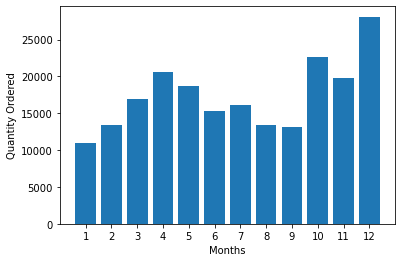

In [29]:
months = range(1, 13)
plt.bar(months, all_sales_data.groupby('months')['Quantity Ordered'].sum())
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Quantity Ordered')

#### In December there were more orders

Text(0, 0.5, 'Total Sales in USD')

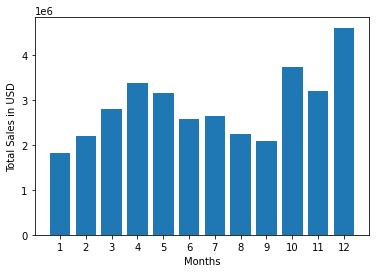

In [37]:
monthly_sales = all_sales_data.groupby('months')['Price'].sum()
plt.bar(months, monthly_sales)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Total Sales in USD')

#### The highest Sales was made in December

In [38]:
def city(x):
    return x.split(',')[1]

In [39]:
all_sales_data['City'] = all_sales_data['Purchase Address'].apply(city)

C:\Users\HP\AppData\Local\Temp\ipykernel_1356\3402895781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_sales_data['City'] = all_sales_data['Purchase Address'].apply(city)


In [40]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Price,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [41]:
city_list = all_sales_data['City'].unique()

In [42]:
city_list

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [43]:
city_order_count = all_sales_data.groupby('City')['Quantity Ordered'].sum()
city_order_count

City
 Atlanta          16602
 Austin           11153
 Boston           22528
 Dallas           16730
 Los Angeles      33289
 New York City    27932
 Portland         14053
 San Francisco    50239
 Seattle          16553
Name: Quantity Ordered, dtype: int32

Text(0, 0.5, 'Quantity Ordered')

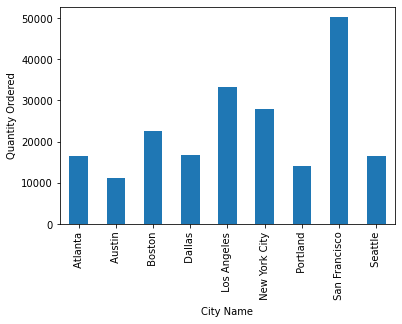

In [51]:
city_order_count.plot.bar()
plt.xlabel('City Name')
plt.ylabel('Quantity Ordered')

#### Most product are odered from San Francisco

In [53]:
'04/19/19 08:46'.split(' ')[1].split(':')[0]

'08'

In [54]:
def hour(x):
    return x.split(' ')[1].split(':')[0]

In [56]:
all_sales_data['hour'] = pd.to_datetime(all_sales_data['Order Date']).dt.hour

In [58]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Price,City,hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


<AxesSubplot:xlabel='hour'>

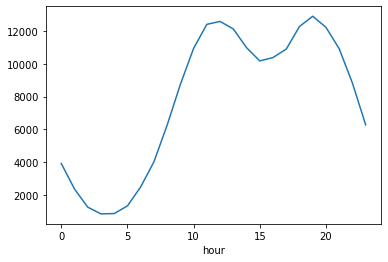

In [65]:

all_sales_data.groupby('hour')['Quantity Ordered'].count().plot()

<AxesSubplot:xlabel='Product'>

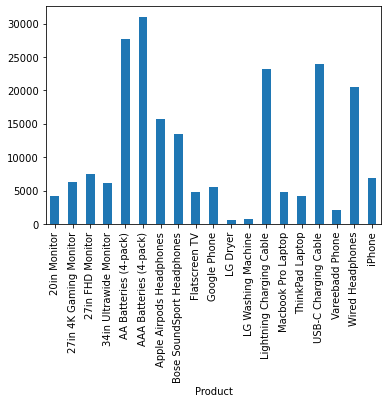

In [67]:
all_sales_data.groupby('Product')['Quantity Ordered'].sum().plot.bar()

In [71]:
Product = all_sales_data.groupby('Product')['Quantity Ordered'].sum().index
Quantity = all_sales_data.groupby('Product')['Quantity Ordered'].sum()
prices = all_sales_data.groupby('Product')['Price'].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_1356\2569859495.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Product, rotation='vertical', size = 8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

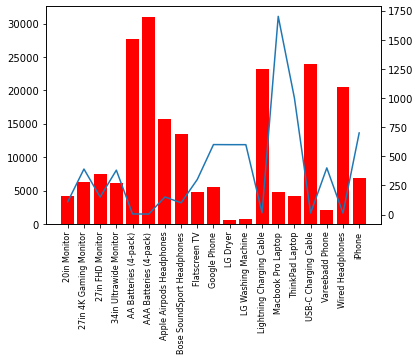

In [72]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(Product, Quantity, color = 'red')
ax2.plot(Product, prices)
ax1.set_xticklabels(Product, rotation='vertical', size = 8)

#### The cheaper the product more quantity is sold


In [85]:
df = all_sales_data['Order ID'].duplicated(keep=False)
df2 = all_sales_data[df]
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Price,City,hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11


In [86]:
df2['All Products']=df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\Users\HP\AppData\Local\Temp\ipykernel_1356\1745214078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['All Products']=df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [87]:
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Price,City,hour,All Products
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [88]:
final_df = df2.drop_duplicates(subset=["Order ID"])

In [89]:
final_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,Price,City,hour,All Products
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"


In [91]:
final_df['All Products'].value_counts()

iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: All Products, Length: 366, dtype: int64

<AxesSubplot:ylabel='All Products'>

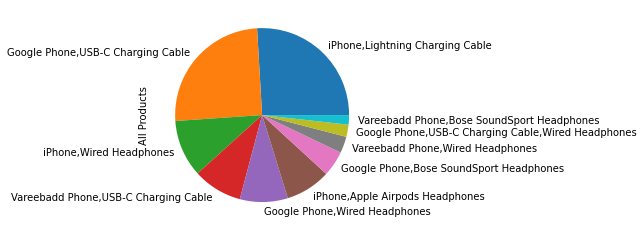

In [94]:
final_df['All Products'].value_counts()[0:10].plot.pie()

#### Hence, iPhone,Lightning Charging Cable are mostly ordered together